In [ ]:
!pip install numpy
!pip install pandas
!pip install pyarrow
!pip install matplotlib
!pip install seaborn
!pip install scipy
!pip install tabulate

In [31]:
# Import Python libraries
import numpy as np # mathematical use
import pandas as pd # dataframe
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sn
import os

In [32]:
current_dir = os.getcwd()
file_path = current_dir + "/Data_Analyst_Assignment_Dataset.csv"
print(file_path)

C:\Users\Shivangi\Downloads\DPZero Data Analyst Assigment/Data_Analyst_Assignment_Dataset.csv


In [33]:
df=pd.read_csv(file_path) #import excel file

In [34]:
df.shape # no. of row and column

(24582, 8)

In [35]:
df.head()

,Amount Pending,State,Tenure,Interest Rate,City,Bounce String,Disbursed Amount,Loan Number
0,963,Karnataka,11,7.69,Bangalore,SSS,10197,JZ6FS
1,1194,Karnataka,11,6.16,Bangalore,SSB,12738,RDIOY
2,1807,Karnataka,14,4.24,Hassan,BBS,24640,WNW4L
3,2451,Karnataka,10,4.70,Bangalore,SSS,23990,6LBJS
4,2611,Karnataka,10,4.41,Mysore,SSB,25590,ZFZUA


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24582 entries, 0 to 24581
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Amount Pending    24582 non-null  int64  
 1   State             24582 non-null  object 
 2   Tenure            24582 non-null  int64  
 3   Interest Rate     24582 non-null  float64
 4   City              24582 non-null  object 
 5   Bounce String     24582 non-null  object 
 6   Disbursed Amount  24582 non-null  int64  
 7   Loan Number       24582 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 1.5+ MB


**DATA CLEANING**


In [37]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values Table:")
print(missing_values)

Missing Values Table:
Amount Pending      0
State               0
Tenure              0
Interest Rate       0
City                0
Bounce String       0
Disbursed Amount    0
Loan Number         0
dtype: int64


In [38]:
# Check for duplicate values
duplicates = df.duplicated()
print("duplicates Values in a Table:")
print(duplicates)

duplicates Values in a Table:
0        False
1        False
2        False
3        False
4        False
         ...  
24577    False
24578    False
24579    False
24580    False
24581    False
Length: 24582, dtype: bool


In [39]:
df.describe() #Summary statistics of numerical columns

,Amount Pending,Tenure,Interest Rate,Disbursed Amount
count,24582.000000,24582.000000,24582.000000,24582.000000
mean,1791.172687,9.415263,0.934960,17705.195468
std,937.565507,3.238904,3.114732,14192.671509
min,423.000000,7.000000,0.000000,2793.000000
25%,1199.000000,8.000000,0.000000,9857.750000
50%,1593.000000,8.000000,0.000000,13592.000000
75%,2083.000000,11.000000,0.000000,19968.000000
max,13349.000000,24.000000,37.920000,141072.000000


In [40]:
print("categorical columns:")
for column in df.select_dtypes(include='object'):
    print(column)
    print(df[column].value_counts())
    print()

categorical columns:
State
State
Maharashtra       6793
Madhya Pradesh    4850
Kerala            4116
Tamil Nadu        3526
Karnataka         2205
Telangana         1931
Andhra Pradesh    1161
Name: count, dtype: int64

City
City
Pune           1780
Bangalore       925
Hyderabad       784
Aurangabad      693
Indore          637
               ... 
MAHE              3
Chengaianna       2
Mandla            2
BURHANPUR         1
Gadchiroli        1
Name: count, Length: 186, dtype: int64

Bounce String
Bounce String
S          3615
SS         3603
FEMI       3222
SSS        2716
SSSS       1790
           ... 
BLBSBBB       1
HBSHSSS       1
LLSBBLB       1
HBBHSSS       1
BHSBB         1
Name: count, Length: 413, dtype: int64

Loan Number
Loan Number
T7WLO    2
HLMUP    2
DEQIK    2
JZ6FS    1
VJ0LN    1
        ..
44XI1    1
69ZP4    1
DU2BN    1
E8MKZ    1
18XBC    1
Name: count, Length: 24579, dtype: int64



**Exploratory Data Analysis**

In [ ]:
# Function to calculate the number of bounce occurrences
def calculate_bounce_count(bounce_string):
    # Count the occurrences of 'B' or 'L' in the bounce string
    return bounce_string.count('B') + bounce_string.count('L')

# Function to determine if the bounce occurred in the last month
def bounce_occurred_last_month(bounce_string):
    # Check if the last character of the bounce string is 'B' or 'L'
    return bounce_string[-1] in ['B', 'L']

# Calculate the number of bounce occurrences and whether the bounce occurred last month
df['Bounce Count'] = df['Bounce String'].apply(calculate_bounce_count)
df['Bounced Last Month'] = df['Bounce String'].apply(bounce_occurred_last_month)
print("Bounce Count and Bounced Last Month:")
from tabulate import tabulate
print( tabulate(df[['Loan Number', 'Bounce Count', 'Bounced Last Month']],headers='keys', tablefmt='pretty'))

In [ ]:
# Calculate the risk labels for all the borrowers 
# Borrowers are "Unknown risk" and "New customers"
unknown_risk = df['Bounce String'].isnull()
new_customers = df['Tenure'] <= 1

# Borrowers in "Low risk" 
# Customers who have not bounced in the last 6 months
low_risk = df['Bounce Count'] == 0

# Borrowers in "Medium risk" 
# Customers who have bounced less than twice in the last 6 months
# The bounce should not have occurred in the last month
medium_risk = (df['Bounce Count'] < 2) & (~df['Bounced Last Month'])

# "High risk" to all other borrowers
high_risk = ~(unknown_risk | new_customers | low_risk | medium_risk)

# Assign risk labels based on masks
df['Risk Label'] = 'Unknown risk'
df.loc[new_customers, 'Risk Label'] = 'New customers'
df.loc[low_risk, 'Risk Label'] = 'Low risk'
df.loc[medium_risk, 'Risk Label'] = 'Medium risk'
df.loc[high_risk, 'Risk Label'] = 'High risk'

from tabulate import tabulate
# Display the risk labels 
print("Risk Labels for Borrowers:")
print(tabulate(df[['Loan Number', 'Risk Label']], headers='keys', tablefmt='pretty'))


In [ ]:
# label all customers based on where they are in their tenure

def label_tenure_status(tenure):
    if tenure == 3:
        return 'Early tenure'
    elif tenure <= 3:
        return 'Late tenure'
    else:
        return 'Mid tenure'

df['Tenure Status'] = df['Tenure'].apply(label_tenure_status)

from tabulate import tabulate
# Display the result
print("Tenure Status for Customers:")
print(tabulate(df[['Loan Number', 'Tenure', 'Tenure Status']], headers='keys', tablefmt='pretty'))

In [ ]:
# Segment borrowers based on ticket size
# Sort borrowers based on amount pending
df_sorted = df.sort_values(by='Amount Pending')

# Calculate the number of borrowers in each cohort
cohort_size = len(df_sorted) // 3

# labels to borrowers in each cohort
df_sorted['Ticket Size Cohort'] = pd.cut(df_sorted.index,
                                         bins=[0, cohort_size, 2 * cohort_size, len(df_sorted)],
                                         labels=['Low ticket size', 'Medium ticket size', 'High ticket size'])


# Display the result
print("Ticket Size Cohort for Borrowers:")
print(df_sorted[['Loan Number', 'Amount Pending', 'Ticket Size Cohort']])


In [ ]:
# Give channel spend recommendations
#Define criteria for each channel
whatsapp_criteria = ((df['Risk Label'] == 'Great') |
                     (df['Tenure'] == 1) |
                     (df['Disbursed Amount'] <= 10000))

voice_criteria = ((df['State'].isin(['Hindi', 'English'])) &
                  (df['Bounce Count'] < 2) &
                  (df['Disbursed Amount'].isin(['Low', 'Medium'])))

human_calling_criteria = ~whatsapp_criteria & ~voice_criteria

# Calculate the total cost for each channel
whatsapp_cost = 5 * whatsapp_criteria.sum()
voice_cost = 10 * voice_criteria.sum()
human_calling_cost = 50 * human_calling_criteria.sum()

# Display the total cost for each channel
print("Total Cost for Each Channel:")
print("Whatsapp Bot Cost:", whatsapp_cost)
print("Voice Bot Cost:", voice_cost)
print("Human Calling Cost:", human_calling_cost)


**Summary**

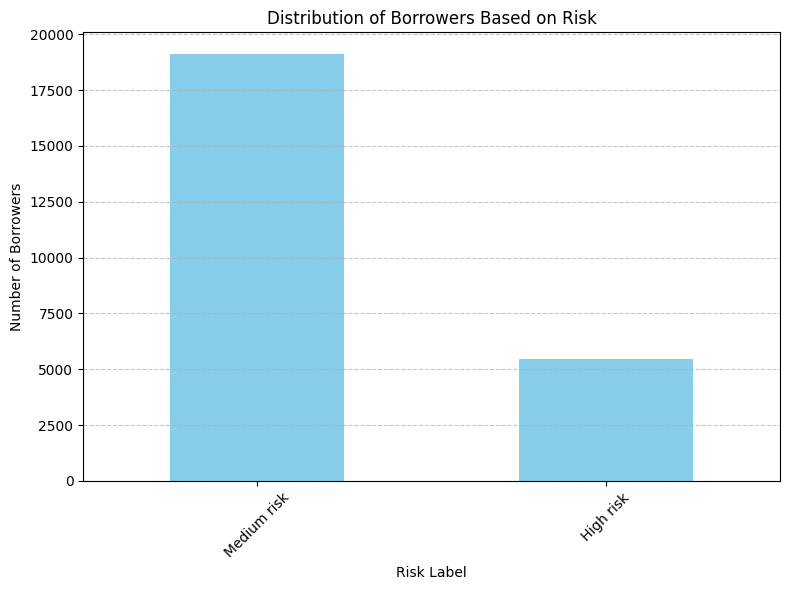

In [24]:
# summary of borrowers (with graphs) based on risk
# Count the number of borrowers in each risk category
risk_counts = df['Risk Label'].value_counts()

# Plot the distribution of borrowers based on risk
plt.figure(figsize=(8, 6))
risk_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Borrowers Based on Risk')
plt.xlabel('Risk Label')
plt.ylabel('Number of Borrowers')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

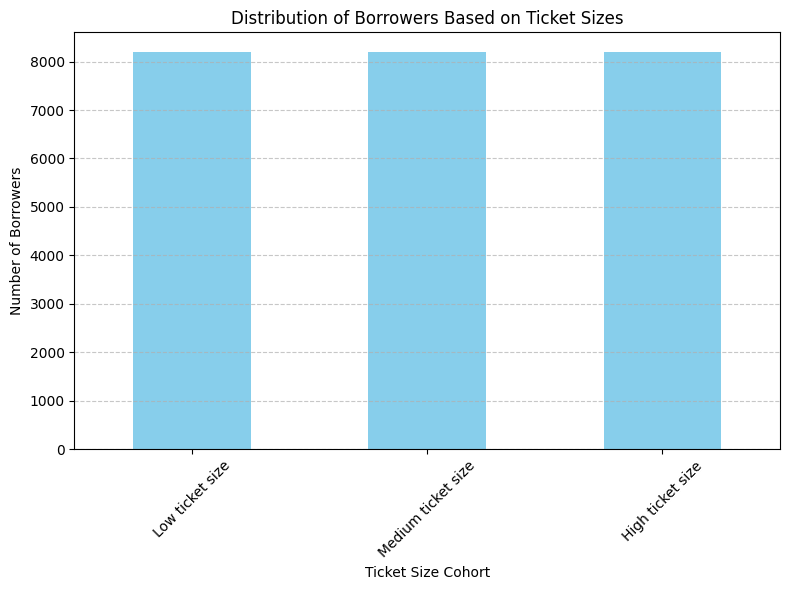

In [25]:
# summary of borrowers (with graphs) based on ticket sizes 
# Count the number of borrowers in each ticket size cohort
ticket_size_counts = df_sorted['Ticket Size Cohort'].value_counts()

# Plot the distribution of borrowers based on ticket sizes
plt.figure(figsize=(8, 6))
ticket_size_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Borrowers Based on Ticket Sizes')
plt.xlabel('Ticket Size Cohort')
plt.ylabel('Number of Borrowers')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

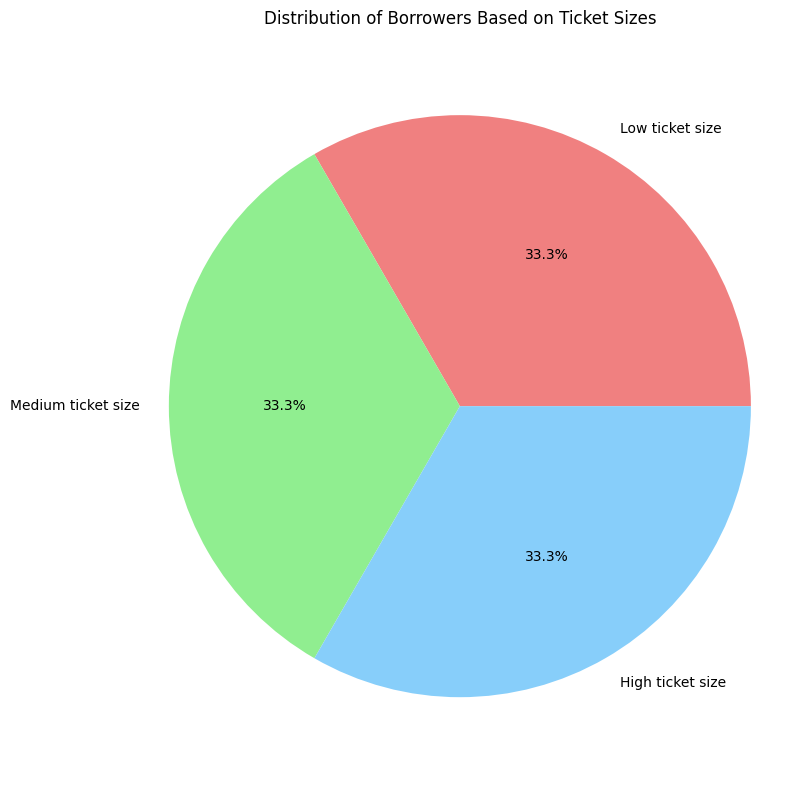

In [26]:
# Plot the distribution of borrowers based on ticket sizes (pie chart)
plt.figure(figsize=(8, 8))
ticket_size_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightgreen', 'lightskyblue'])
plt.title('Distribution of Borrowers Based on Ticket Sizes')
plt.ylabel('')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

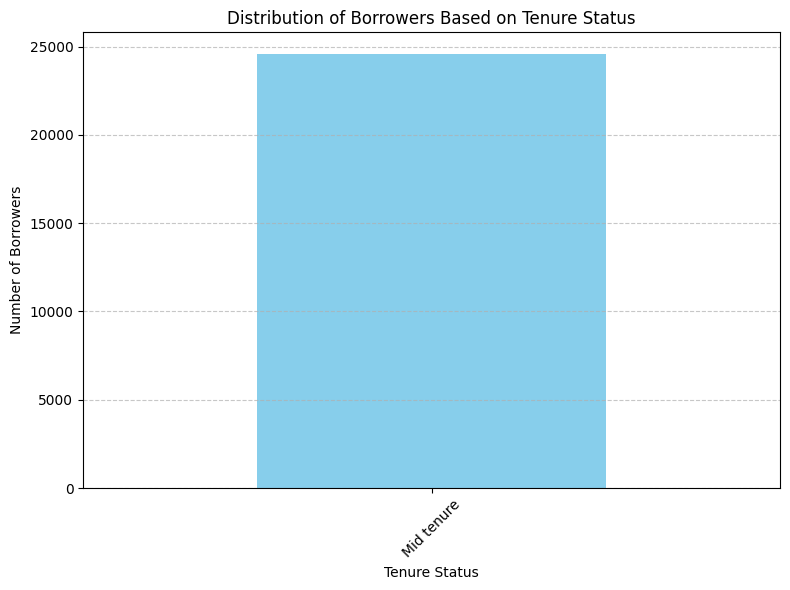

In [27]:
# Summary of borrowers (with graphs) based on tenure completion
# Count the number of borrowers in each tenure status category
tenure_status_counts = df['Tenure Status'].value_counts()

# Plot the distribution of borrowers based on tenure status
plt.figure(figsize=(8, 6))
tenure_status_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Borrowers Based on Tenure Status')
plt.xlabel('Tenure Status')
plt.ylabel('Number of Borrowers')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

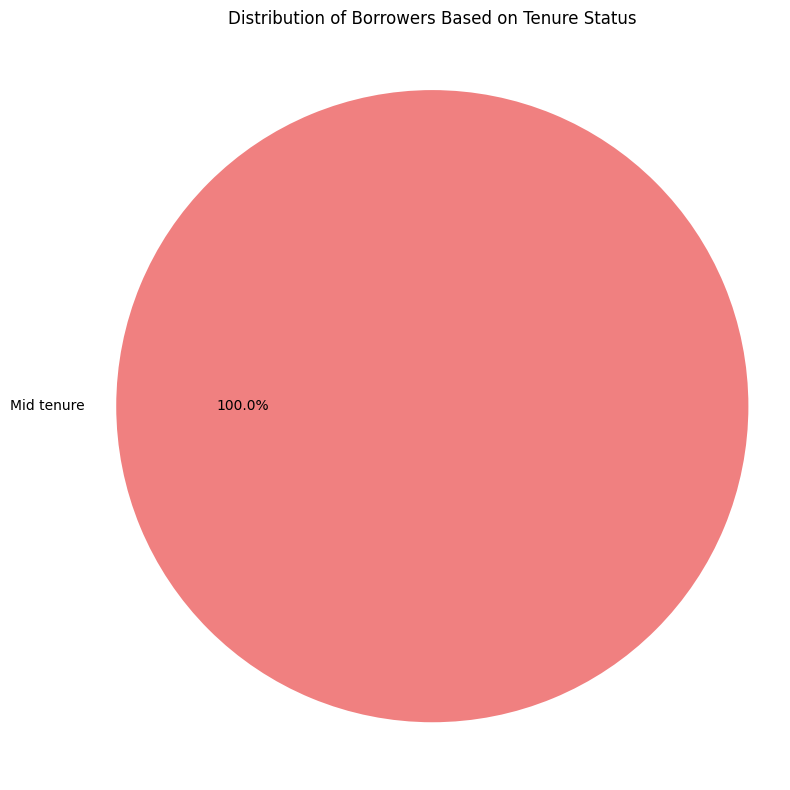

In [28]:
# Plot the distribution of borrowers based on tenure status (pie chart)
plt.figure(figsize=(8, 8))
tenure_status_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightgreen', 'lightskyblue'])
plt.title('Distribution of Borrowers Based on Tenure Status')
plt.ylabel('')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()


Spend Recommendation:
WhatsApp Bot: Utilize for borrowers with 'Great' risk label, in first tenure month, or with low disbursed amount.
Voice Bot: Utilize for borrowers in Hindi or English-speaking states, with low bounce count, and low to medium disbursed amount.
Human Calling: Reserve for cases not covered by WhatsApp or Voice Bot, where personalized intervention is necessary.

Total Cost for Each Channel:
WhatsApp Bot Cost: 31480
Voice Bot Cost: 0
Human Calling Cost: 914300


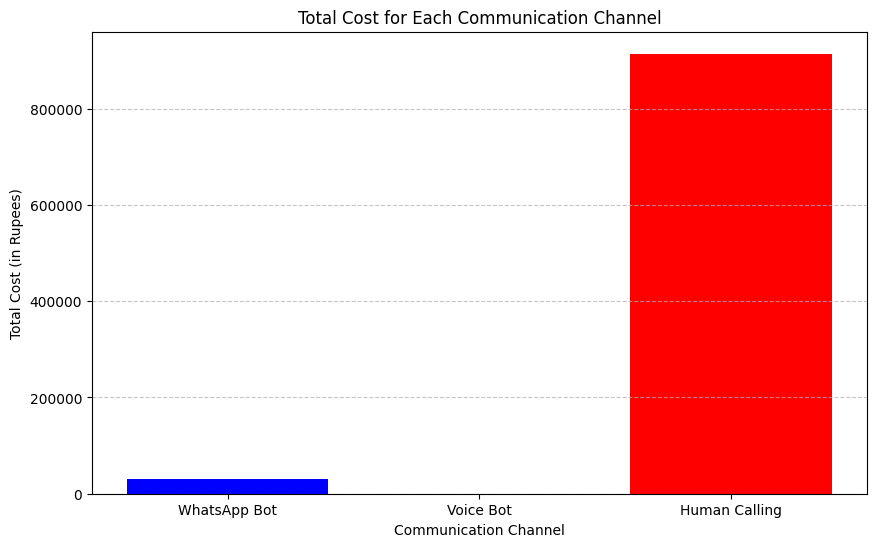

In [30]:
# Spend recommendation - you need to articulate on how you have minimised spend while keeping in mind high repayment rate
# Define criteria for each channel
whatsapp_criteria = ((df['Risk Label'] == 'Great') |
                     (df['Tenure'] == 1) |
                     (df['Disbursed Amount'] <= 10000))

voice_criteria = ((df['State'].isin(['Hindi', 'English'])) &
                  (df['Bounce Count'] < 2) &
                  (df['Disbursed Amount'].isin(['Low', 'Medium'])))

human_calling_criteria = ~whatsapp_criteria & ~voice_criteria

# Calculate the total cost for each channel
whatsapp_cost = 5 * whatsapp_criteria.sum()
voice_cost = 10 * voice_criteria.sum()
human_calling_cost = 50 * human_calling_criteria.sum()

# Articulate spend recommendation
print("Spend Recommendation:")
print("WhatsApp Bot: Utilize for borrowers with 'Great' risk label, in first tenure month, or with low disbursed amount.")
print("Voice Bot: Utilize for borrowers in Hindi or English-speaking states, with low bounce count, and low to medium disbursed amount.")
print("Human Calling: Reserve for cases not covered by WhatsApp or Voice Bot, where personalized intervention is necessary.")

# Display the total cost for each channel
print("\nTotal Cost for Each Channel:")
print("WhatsApp Bot Cost:", whatsapp_cost)
print("Voice Bot Cost:", voice_cost)
print("Human Calling Cost:", human_calling_cost)


channels = ['WhatsApp Bot', 'Voice Bot', 'Human Calling']
costs = [whatsapp_cost, voice_cost, human_calling_cost]

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(channels, costs, color=['blue', 'green', 'red'])
plt.xlabel('Communication Channel')
plt.ylabel('Total Cost (in Rupees)')
plt.title('Total Cost for Each Communication Channel')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()